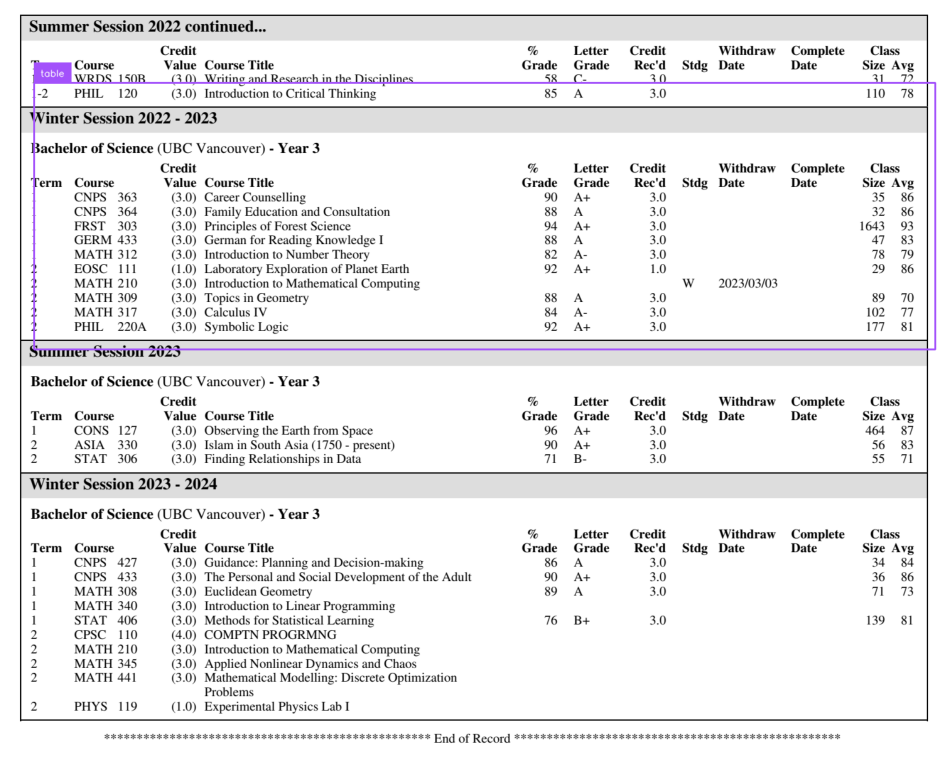

In [58]:
import cv2
import matplotlib.pyplot as plt
import supervision as sv
# import cv2 to helo load our image
import cv2
import inference

img_path = "/Users/declanbracken/Development/UofT_Projects/Meng_Project/Transcripts/Real Transcripts/6.png"
image = cv2.imread(img_path)

model = inference.get_model("table-finder-aum80/1",api_key="mj1WEV40JVXuIxIiRilw")
response = model.infer(
    image=img_path,
    confidence=0.5,
    iou_threshold=0.3
)

# load the results into the supervision Detections api
detections = sv.Detections.from_inference(response[0].dict(by_alias=True, exclude_none=True))

# create supervision annotators
bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

# annotate the image with our inference results
annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

# display the image
sv.plot_image(annotated_image)
